In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 #pip install opencv-python

In [2]:
train_dir_data01 = os.path.abspath(os.getcwd())+"\\train\\data01_train\\"
val_dir_data01 = os.path.abspath(os.getcwd())+"\\dev\\data01_dev"
num_train_data01 = len(os.listdir(train_dir_data01))
num_val_data01 = len(os.listdir(val_dir_data01))
print("Train data count: " + str(num_train_data01))
print("Validation data count: " + str(num_val_data01))

Train data count: 50000
Validation data count: 10000


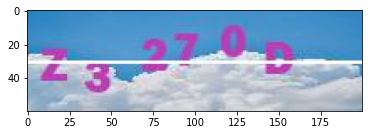

In [3]:
imgtest = plt.imread(train_dir_data01+"\\000000.jpg")
plt.imshow(imgtest)

In [4]:
import pandas as pd
data = pd.read_csv("train\\data01_train.csv")

In [5]:
for i in range(len(data)):
    data.iloc[i,1] = list(data.iloc[i,1])
data

,filename,code
0,000000.jpg,"[Z, 3, 2, 7, 0, D]"
1,000001.jpg,"[V, M, Y, X, E, 8]"
2,000002.jpg,"[J, Z, K, W, V, U]"
3,000003.jpg,"[X, 9, I, 2, 7, H]"
4,000004.jpg,"[H, 5, X, G, R, 2]"
...,...,...
49995,049995.jpg,"[3, Y, F, I, S, E]"
49996,049996.jpg,"[4, S, U, T, F, 7]"
49997,049997.jpg,"[C, Y, U, N, 0, 9]"
49998,049998.jpg,"[K, C, D, 8, I, O]"


In [6]:
arr = np.zeros([6,50000],str)
for j in range(6):
    for i in range(len(data)):
        arr[j][i] = data.iloc[i,1][j]
data = data.drop(columns= ["code"]).join(pd.DataFrame(arr.transpose(),columns = ["code0","code1",'code2','code3','code4','code5']))
data

,filename,code0,code1,code2,code3,code4,code5
0,000000.jpg,Z,3,2,7,0,D
1,000001.jpg,V,M,Y,X,E,8
2,000002.jpg,J,Z,K,W,V,U
3,000003.jpg,X,9,I,2,7,H
4,000004.jpg,H,5,X,G,R,2
...,...,...,...,...,...,...,...
49995,049995.jpg,3,Y,F,I,S,E
49996,049996.jpg,4,S,U,T,F,7
49997,049997.jpg,C,Y,U,N,0,9
49998,049998.jpg,K,C,D,8,I,O


In [7]:
batch_size = 128
epochs = 15
IMG_HEIGHT = imgtest.shape[0]
IMG_WIDTH = imgtest.shape[1]
CLASS_NAMES = np.array([])
for i in range(10):
    CLASS_NAMES =np.append(CLASS_NAMES,chr(ord("0")+i))
for i in range(26):
    CLASS_NAMES = np.append(CLASS_NAMES,chr(ord("A")+i))

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [9]:
train_data_gen = train_image_generator.flow_from_dataframe(data,
                                                           directory = train_dir_data01,
                                                           x_col = "filename",
                                                           y_col = ["code0","code1",'code2','code3','code4','code5'],
                                                           batch_size=batch_size,
                                                           #shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode = "multi_output",
                                                           classes=list(CLASS_NAMES))

Found 50000 validated image filenames.


In [10]:
def show_batch(image_batch, label_batchh):
  plt.figure(figsize=(14,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(list(np.array(label_batchh)[:,n]))
      plt.axis('off')

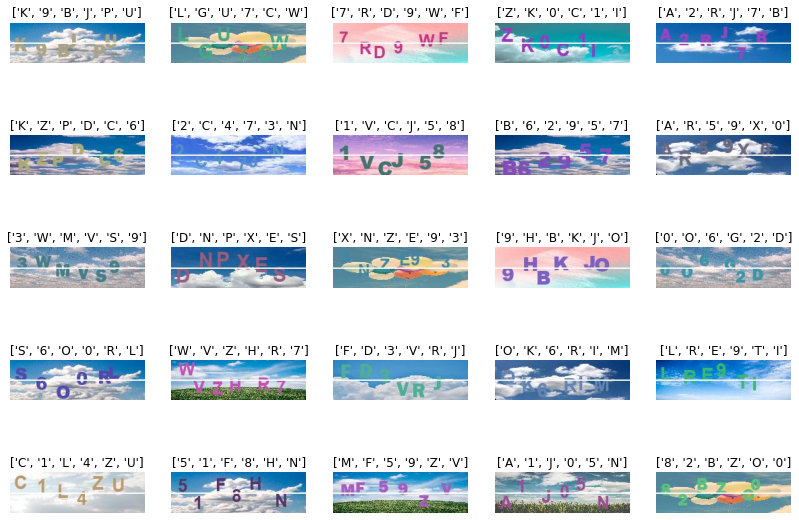

In [11]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [12]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])